In [1]:
import pandas as pd

In [2]:
df_review = pd.read_csv("./Crawling_Kyobo_Review.csv",  index_col= 0)
df_review

,ID,ISBN,grade,review,grade_count
0,ah**a0811,9791130627878,4.0,내가 원하는것을 모르고 살았던 것이 맞았다.\r\n그저 한줄기 빛을 보며 그것이 내...,4.0
1,jc**msam,9791130628639,4.0,굿~~,4.0
2,re**o,9791130628639,3.0,잘 보겠습니다.,3.0
3,wo**367,9791130628639,4.0,요즘 시기에 희망적인 책입니다.,4.0
4,rn**6492,9791130627878,4.0,설레는 마음으로 받았습니다~\r\n꼭 제얘기 인것만 같아서 한페이지를 읽고 또 읽고...,4.0
...,...,...,...,...,...
42030,th**553,9791162241882,4.0,잘읽히고 시작하기좋네요,4.0
42031,wo**dwofkd,9791162241882,4.0,좋아요!!!!!!!!,4.0
42032,th**lxo123,9791162241882,4.0,좋아요,4.0
42033,wi**iscar,9791162241882,4.0,유튜브 동영상도 있어서 좋습니다,4.0


In [3]:
df_review.describe()

,ISBN,grade,grade_count
count,4.203500e+04,42035.000000,42035.000000
mean,9.789912e+12,3.784894,3.784894
std,1.097933e+09,0.564636,0.564636
min,9.788900e+12,0.000000,0.000000
25%,9.788955e+12,4.000000,4.000000
50%,9.788990e+12,4.000000,4.000000
75%,9.791164e+12,4.000000,4.000000
max,9.791197e+12,4.000000,4.000000


In [4]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42035 entries, 0 to 42034
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42035 non-null  object 
 1   ISBN         42035 non-null  int64  
 2   grade        42035 non-null  float64
 3   review       42035 non-null  object 
 4   grade_count  42035 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.9+ MB


In [5]:
df_review.isnull().sum()

ID             0
ISBN           0
grade          0
review         0
grade_count    0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

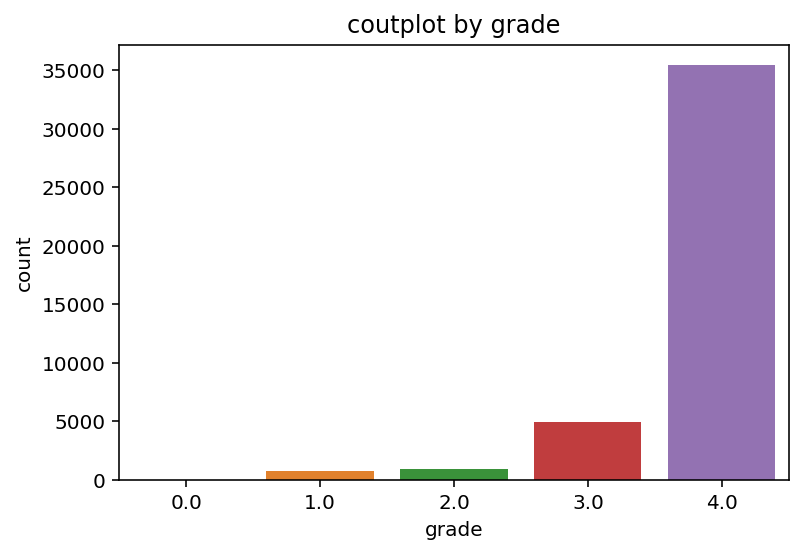

In [7]:
sns.countplot(x="grade", data=df_review)
plt.title("coutplot by grade")
plt.show()

In [80]:
df_grade1 = df_review[df_review["grade"] == 1.0].reset_index(drop=False)
df_grade2 = df_review[df_review["grade"] == 2.0].reset_index(drop=False)
df_grade3 = df_review[df_review["grade"] == 3.0].reset_index(drop=False)
df_grade4 = df_review[df_review["grade"] == 4.0].reset_index(drop=False)

In [8]:
reviews = []
reviews2 = []
reviews3 = []
reviews4 = []

for i in range(len(df_review)):
    if df_review['grade'][i] == 1.0:
        review = df_review['review'][i]
        reviews.append(review)
    elif df_review['grade'][i] == 2.0:
        review2 = df_review['review'][i]
        reviews2.append(review2)
    elif df_review['grade'][i] == 3.0:
        review3 = df_review['review'][i]
        reviews3.append(review3)
    elif df_review['grade'][i] == 4.0:
        review4 = df_review['review'][i]
        reviews4.append(review4)
    
    
    
    

len(reviews), len(reviews2), len(reviews3), len(reviews4)      

(732, 944, 4950, 35407)

In [9]:
text1 = ' '.join(reviews)
text2 = ' '.join(reviews2)
text3 = ' '.join(reviews3)
text4 = ' '.join(reviews4)

In [13]:
with open('1grade_reviews.txt', 'w', encoding='utf8') as f:
    f.write(text1)
with open('2grade_reviews.txt', 'w', encoding='utf8') as f2:
    f2.write(text2)
with open('3grade_reviews_txt', 'w', encoding='utf8') as f3:
    f3.write(text3)
with open('4grade_reviews_txt', 'w', encoding='utf8') as f4:
    f4.write(text4)

In [17]:
grade1_reviews = open('1grade_reviews.txt', encoding='utf8').read()
grade2_reviews = open('2grade_reviews.txt', encoding='utf8').read()
grade3_reviews = open('3grade_reviews_txt', encoding='utf8').read()
grade4_reviews = open('4grade_reviews_txt', encoding='utf8').read()


In [22]:
import nltk
from konlpy.corpus import kobill

In [19]:
from konlpy.tag import Okt;
t = Okt()
tokens_ko = t.nouns(grade1_reviews)
tokens_ko2 = t.nouns(grade2_reviews)
tokens_ko3 = t.nouns(grade3_reviews)
tokens_ko4 = t.nouns(grade4_reviews)

In [25]:
ko = nltk.Text(tokens_ko, name="교보문고 평점1점대 리뷰")
ko2 = nltk.Text(tokens_ko2, name="교보문고 평점2점대 리뷰")
ko3 = nltk.Text(tokens_ko3, name="교보문고 평점3점대 리뷰")
ko4 = nltk.Text(tokens_ko4, name="교보문고 평점4점대 리뷰")

In [31]:
print(len(ko.tokens), len(ko2.tokens), len(ko3.tokens), len(ko4.tokens))
print(len(set(ko.tokens)), len(set(ko2.tokens)), len(set(ko3.tokens)), len(set(ko4.tokens)))
ko.vocab()

9071 7006 25209 177199
2157 1830 3912 10788


FreqDist({'책': 515, '내용': 175, '것': 154, '생각': 126, '이': 101, '부분': 76, '작가': 74, '구매': 71, '말': 67, '제목': 67, ...})

In [30]:
ko2.vocab()

FreqDist({'책': 370, '내용': 162, '것': 125, '생각': 114, '좀': 65, '부분': 65, '수': 63, '그냥': 51, '이': 48, '대한': 48, ...})

In [29]:
ko3.vocab()

FreqDist({'책': 1396, '것': 415, '생각': 373, '내용': 351, '수': 321, '도움': 230, '구매': 211, '공부': 185, '이': 175, '더': 161, ...})

In [32]:
ko4.vocab()

FreqDist({'책': 11219, '것': 2637, '수': 2292, '생각': 2217, '도움': 1735, '이': 1730, '내용': 1728, '공부': 1563, '구매': 1410, '추천': 1309, ...})

In [35]:
from matplotlib import font_manager, rc
f_path = 'C://Windows/Fonts/malgun.ttf'

font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

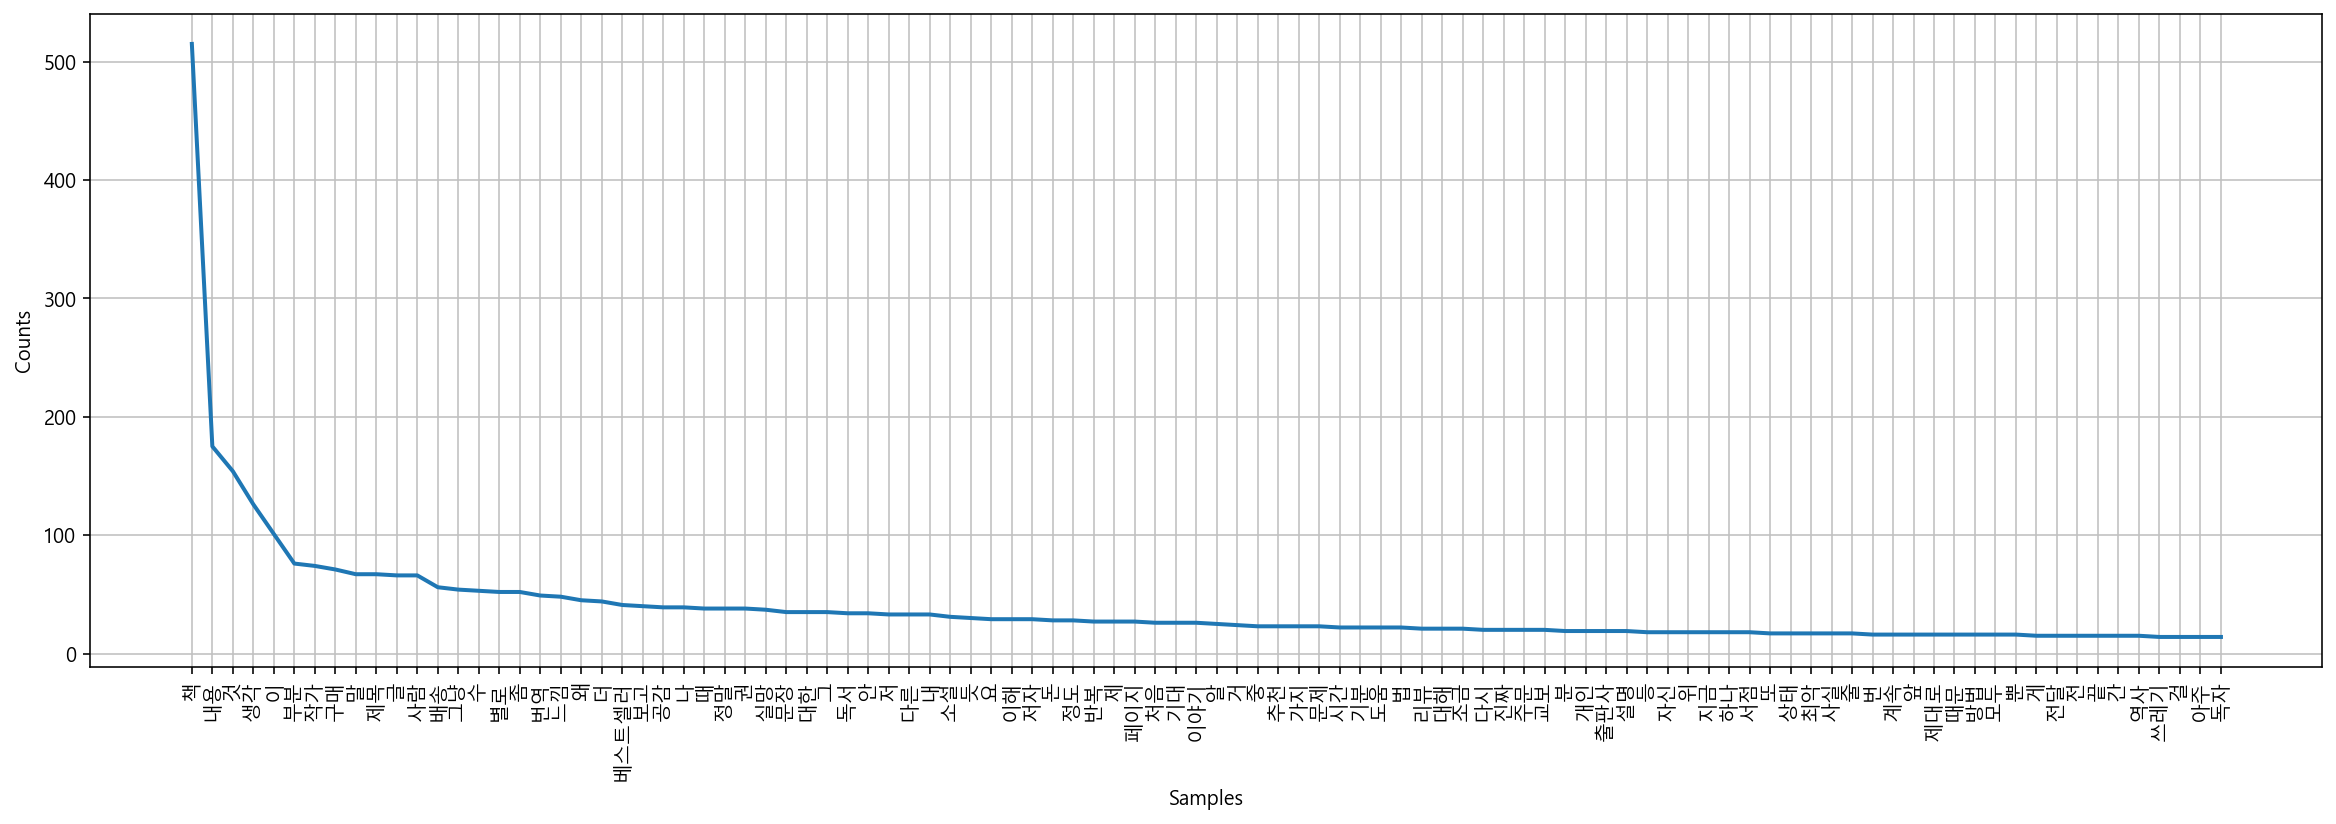

In [65]:
plt.figure(figsize=(20, 6))
ko.plot(100)
plt.show()

In [51]:
stop_words = ['책', '것', '이', '부분', '때', '대한', '안', '저', '내', '듯', '요', '알', '거', '중', '내용', '생각', '수']
ko = [each_word for each_word in ko if each_word not in stop_words]
ko2 = [each_word for each_word in ko2 if each_word not in stop_words]
ko3 = [each_word for each_word in ko3 if each_word not in stop_words]
ko4 = [each_word for each_word in ko4 if each_word not in stop_words]

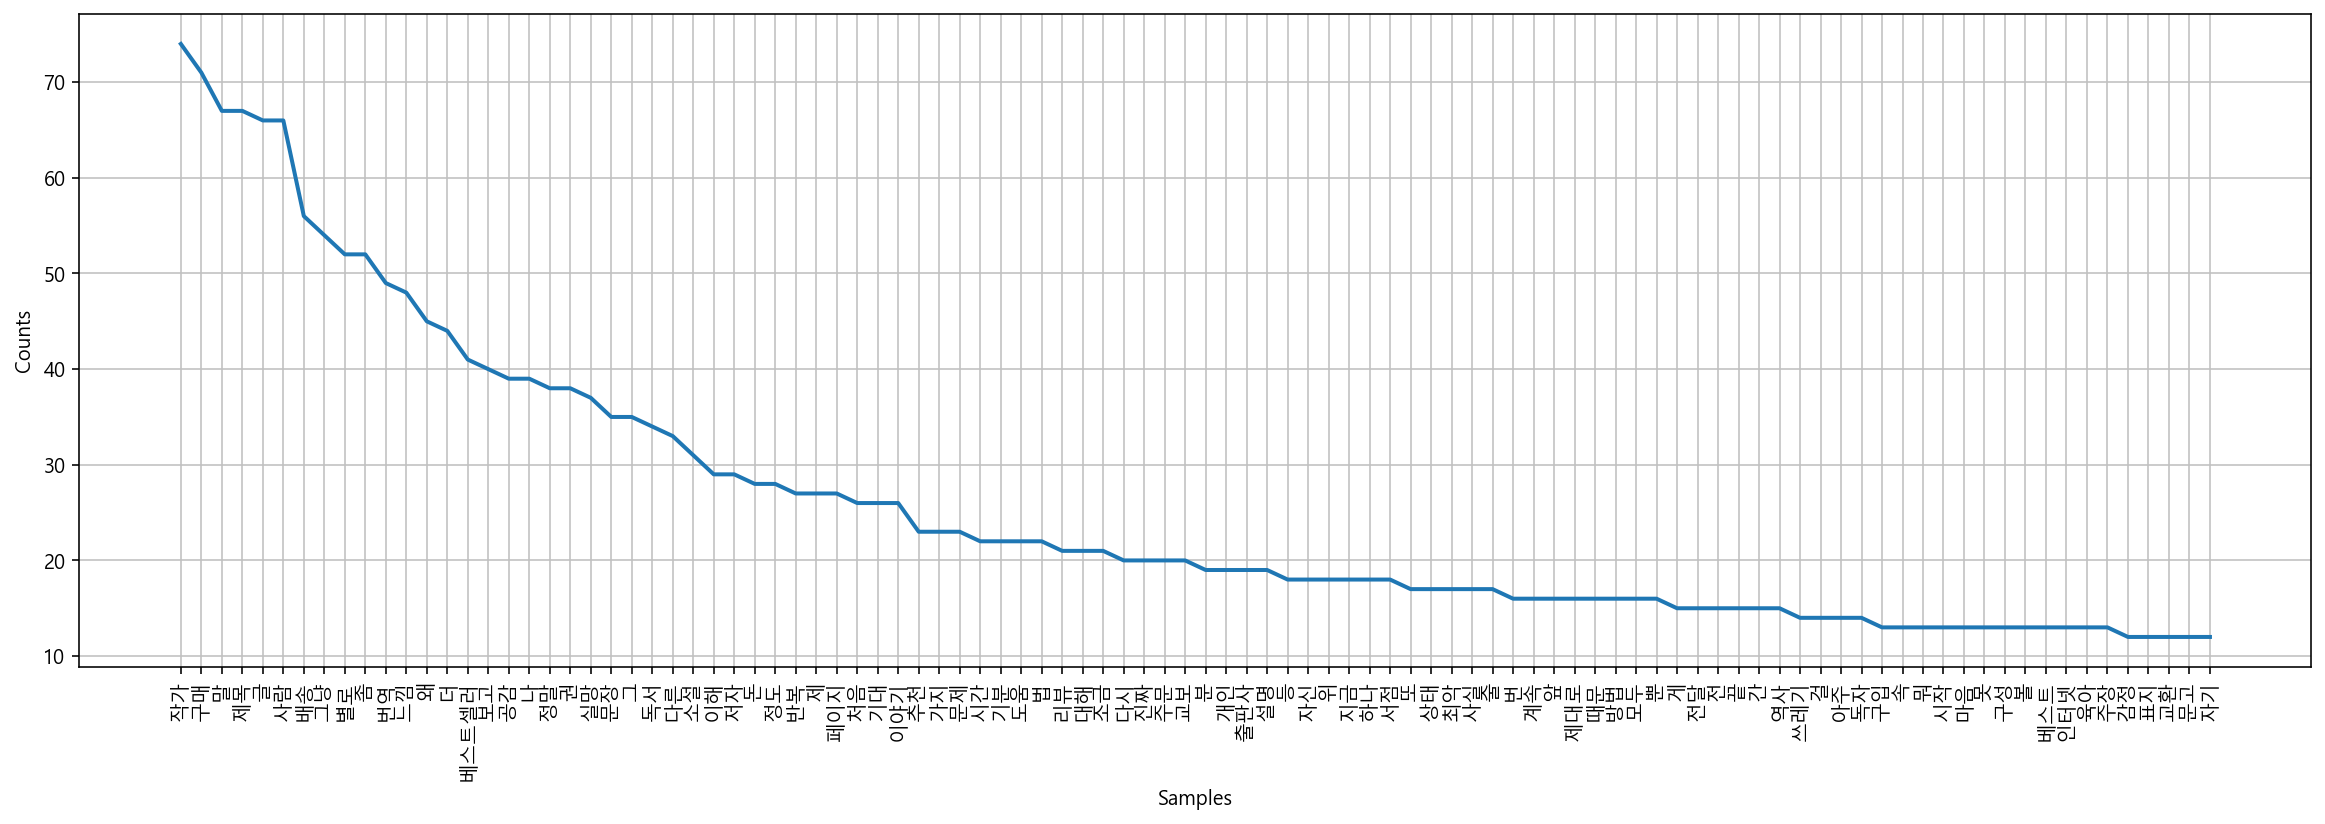

In [52]:
ko = nltk.Text(ko, name="교보문고 평점1점대 리뷰2")

plt.figure(figsize=(20, 6))
ko.plot(100)
plt.show()

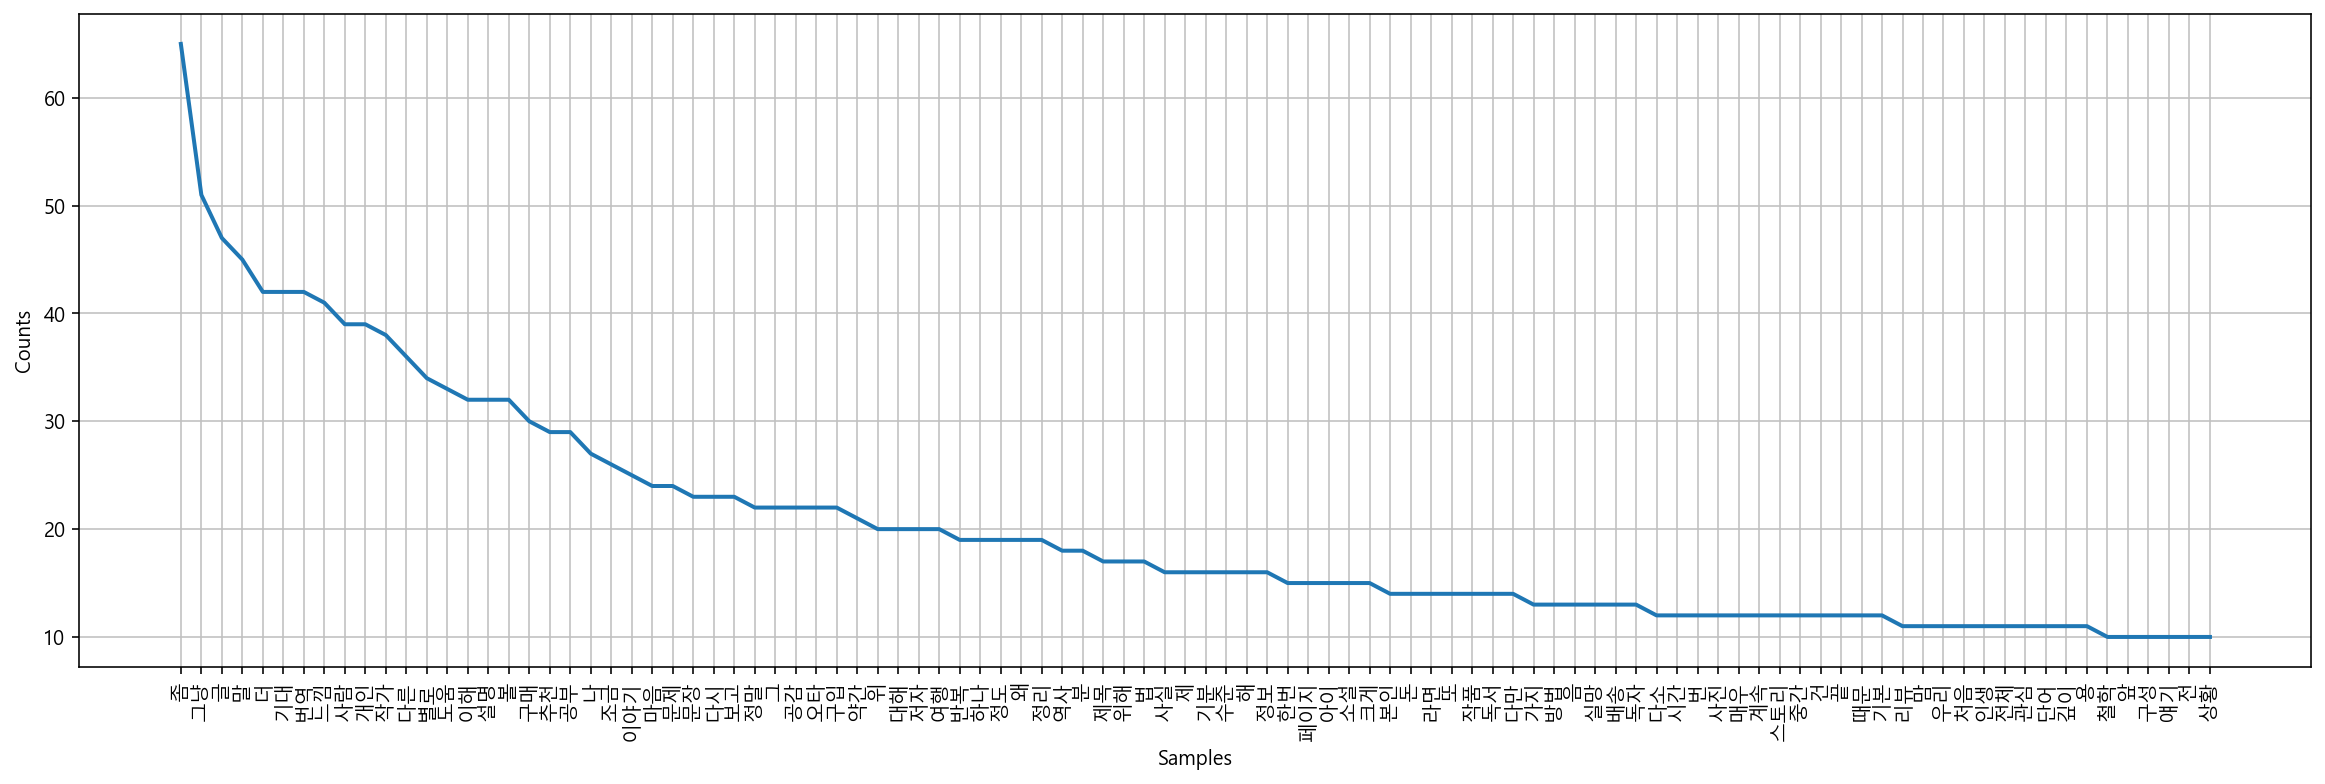

In [53]:
ko2 = nltk.Text(ko2, name="교보문고 평점2점대 리뷰2")

plt.figure(figsize=(20, 6))
ko2.plot(100)
plt.show()

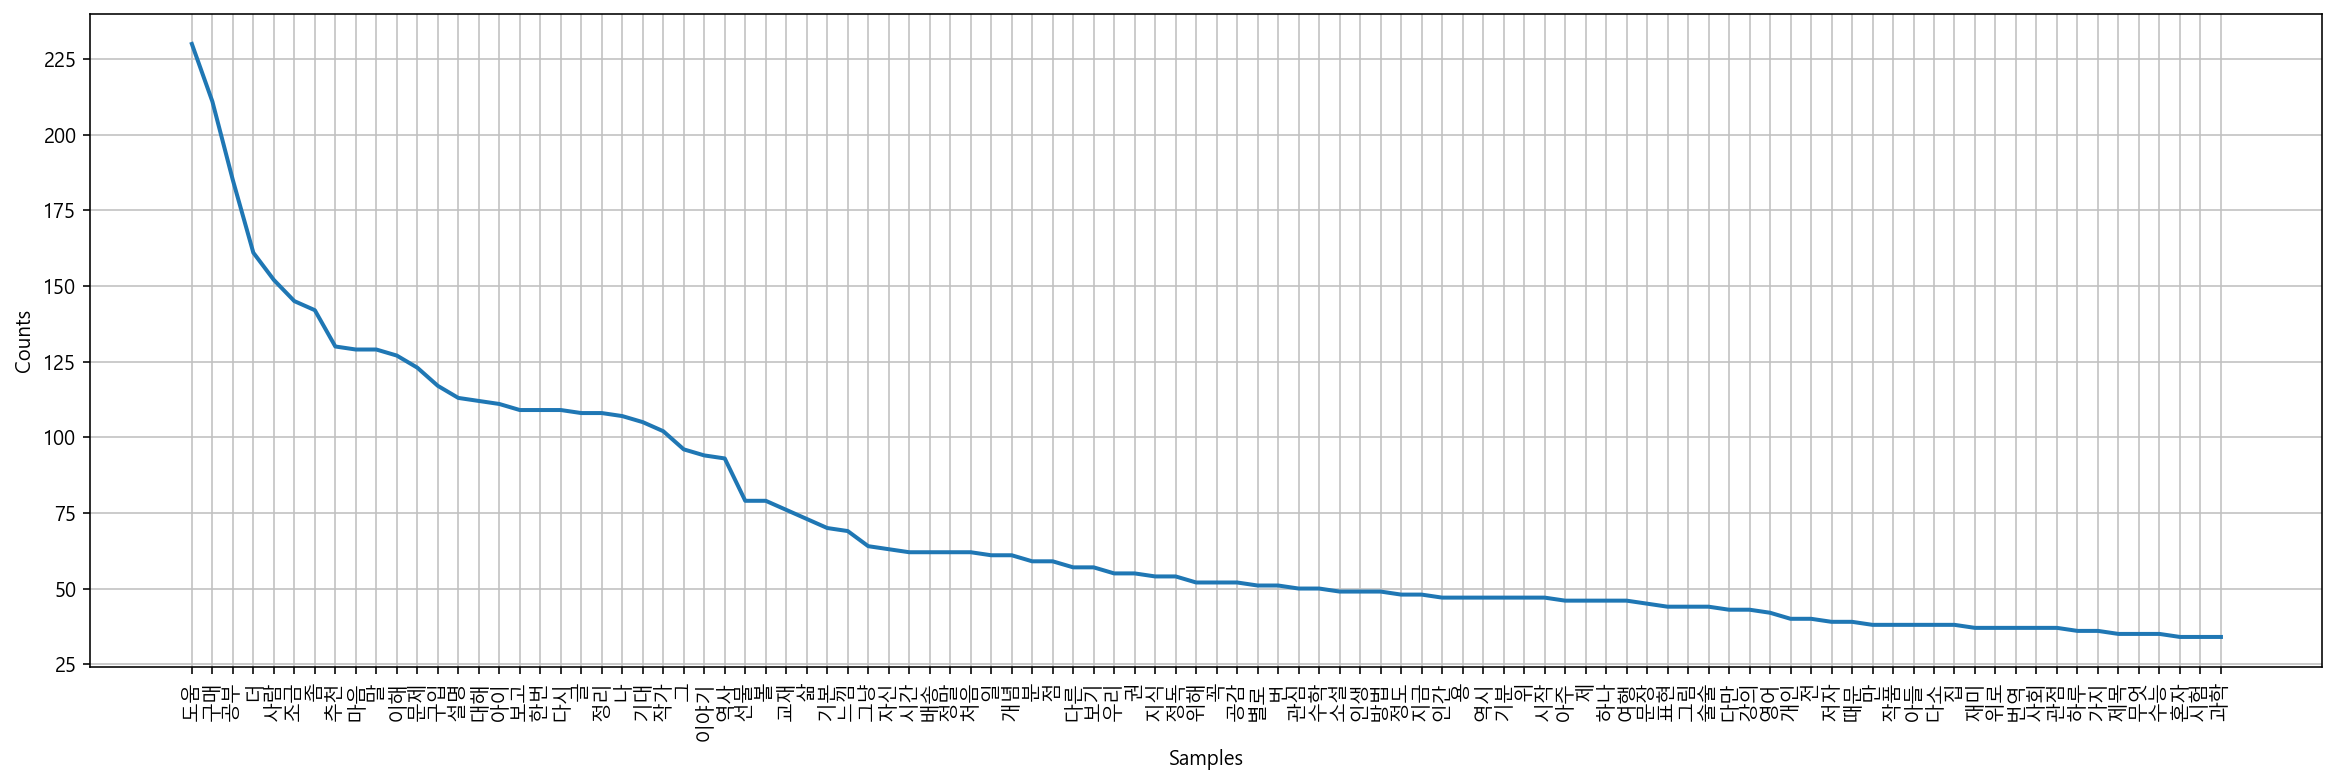

In [54]:
ko3 = nltk.Text(ko3, name="교보문고 평점3점대 리뷰2")

plt.figure(figsize=(20, 6))
ko3.plot(100)
plt.show()

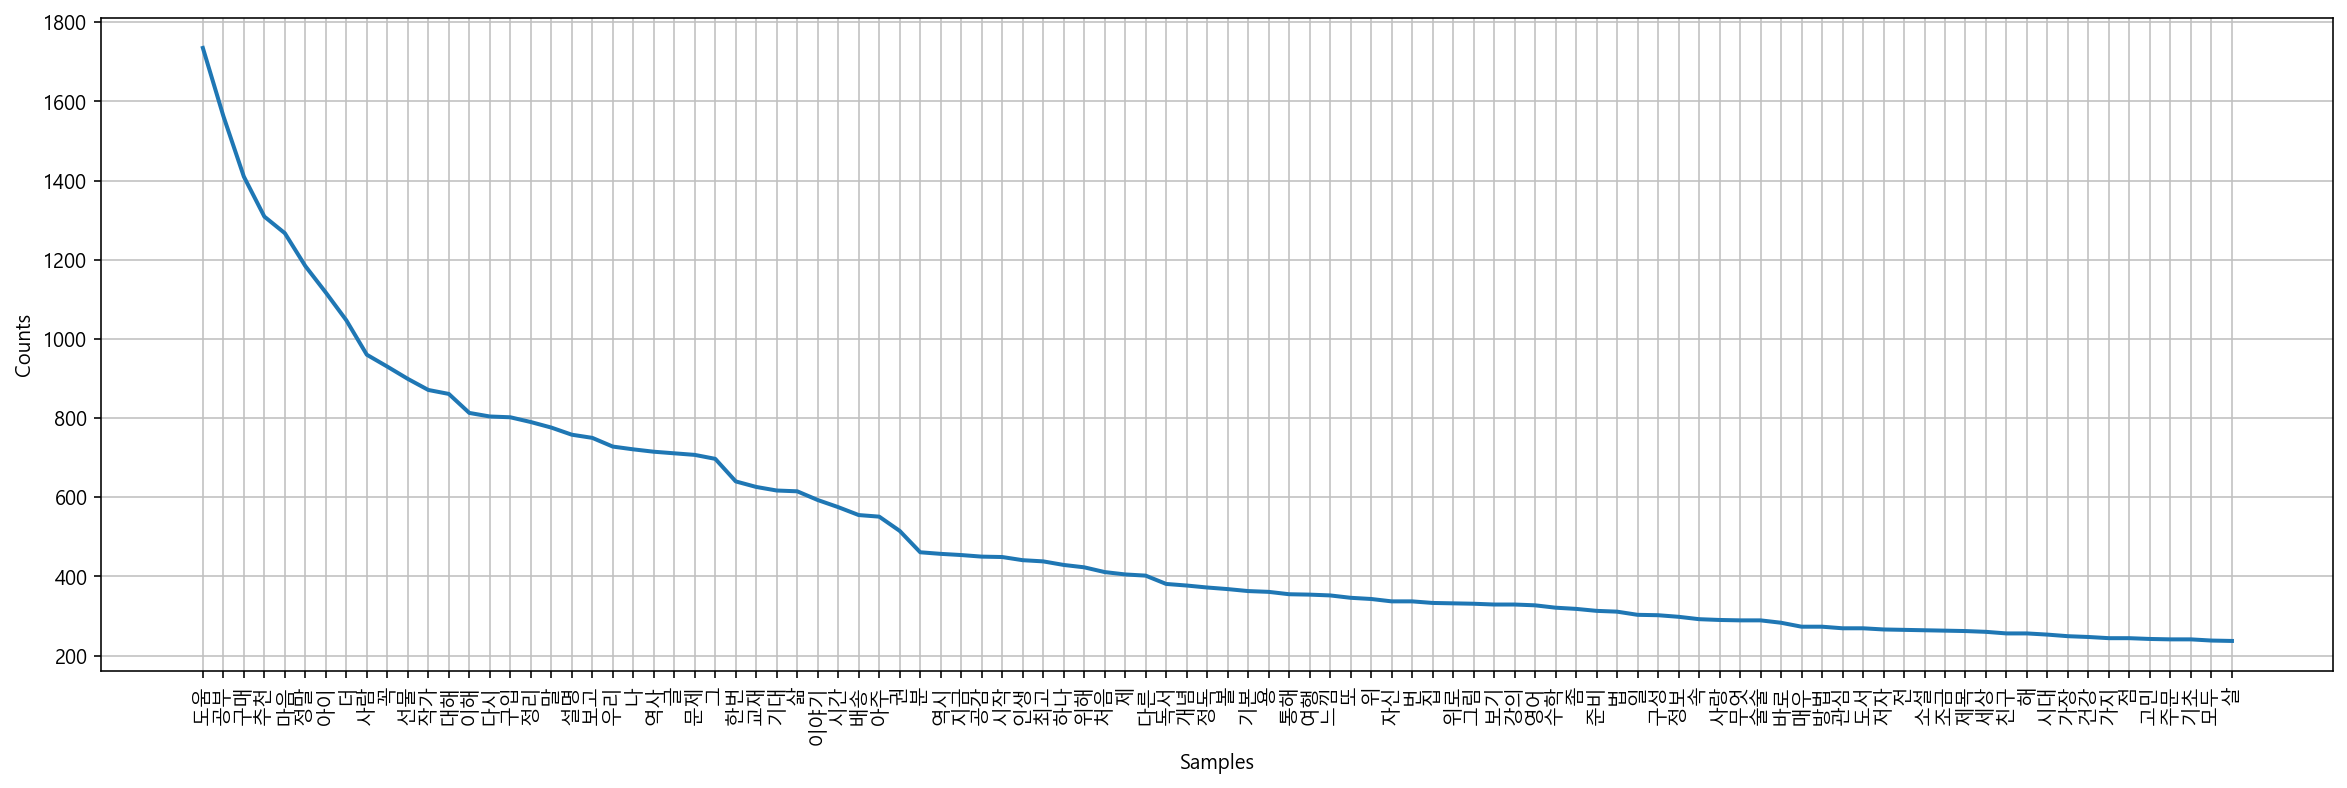

In [55]:
ko4 = nltk.Text(ko4, name="교보문고 평점4점대 리뷰2")

plt.figure(figsize=(20, 6))
ko4.plot(100)
plt.show()

In [79]:
ko3.concordance('조금')

Displaying 25 of 145 matches:
 인간 발달 과정 사실 표현 역사 진화 과정 오늘날 우리 인간 성품 조금 이해 한마디 놀람 신비 로움 자체 저자 무한 감사 개인 베르나르 왜
작가 경험 상실 대해 특유 말투 이야기 흘들리 명의 보통 존재 만날 조금 공개 일기장 반 흡입 최고다 그 후 제목 김이나 사법 말 습 김이나
흡입 최고다 그 후 제목 김이나 사법 말 습 김이나 곡 이야기 사법 조금 부족 백범 김구 시절 한번 더 문장 표현 자주 정독 볼 역사 시대 
재 미래 간관 미래 선물 현재 남자친구 하나 데이트 코스 서로 대해 조금 더 이해 계기 듭니 연인 선물 인스타 더 구매 습 남친 데이트 용도
날 선 문체 뉴스 강남역 살인 사건 나오니 도해 그 지금 주변 드니 조금 밤 만킁 누구 슬픔 기쁨 기억 너머 기억 어른 어른 어른 아이 적 
쁨 기억 너머 기억 어른 어른 어른 아이 적 어디 보이 보지 이야기 조금 성장 소설 불구 순간 너 그 자기 최선 다해 살 현실 어딘가 존재 
캔들 촛불 빈통 휴대폰 플래쉬 위 조명 소설 분 추천 구매 술술 끝 조금 삶 인생 순간 가장 요즘 문득 문득 더욱더 절실 머릿속 학창시절 아
민 제 자존감 상처 마음 당장 그것 류 한계 불구 상처 자존감 마음 조금 책임 부정 순 배터리 핸드폰 방법 잔 버튼 충전 실천 나 이제 위안
야기 흐름 글 장치 처럼 소설 후 의문 인물 내면 심리 캐릭터 발달 조금 분명 공감 감정 선 악 강 약 상식 비상 주제 재미 그 인간 라면 
스로 주변인 관계 만이 권 자리 번 끝 전의 기욤 뮈 소의 몇 작품 조금 이번 작품 가독성 특유 문체 다만 뜬금 진실 독자 결말 대해 결말 
살림 그것 움 무엇 사람 수도 편 사람 화 화 위 남 여의 삶 사람 조금 남자 여자 서로 이해 오해만 뿐 부부싸움 을해 부인 멍 남편 화살 
자꾸 다시 문체 매력 기억 글 한번 남편 선물 늘 시인 시 늘 이분 조금 블로그 추천 글 보고 구매 그냥 기대 종류 최근 술술 반면 진도 안
사람 사랑 시대 대하 상실 시대 부제 무

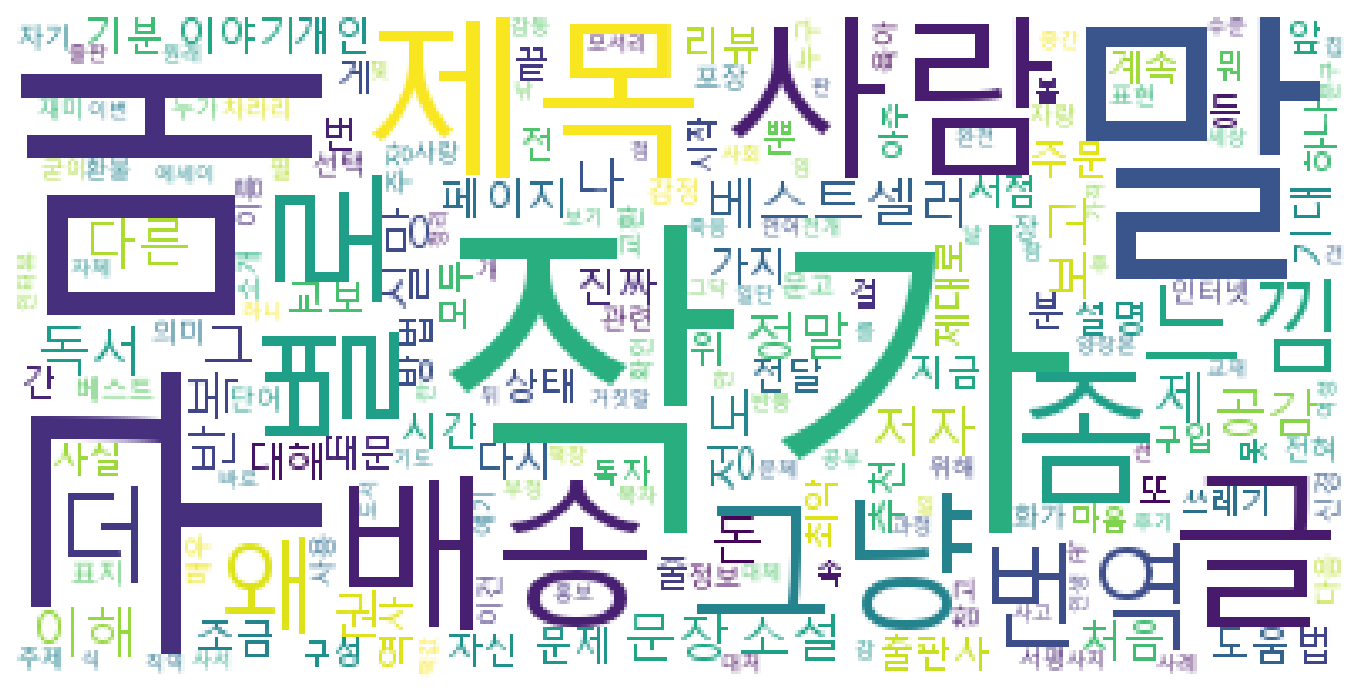

In [58]:
# 평점 1점대의 많이 나오는 단어 클라우드
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path=f_path, relative_scaling= 0.2, 
                      background_color='white',
                      ).generate_from_frequencies(dict(data))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

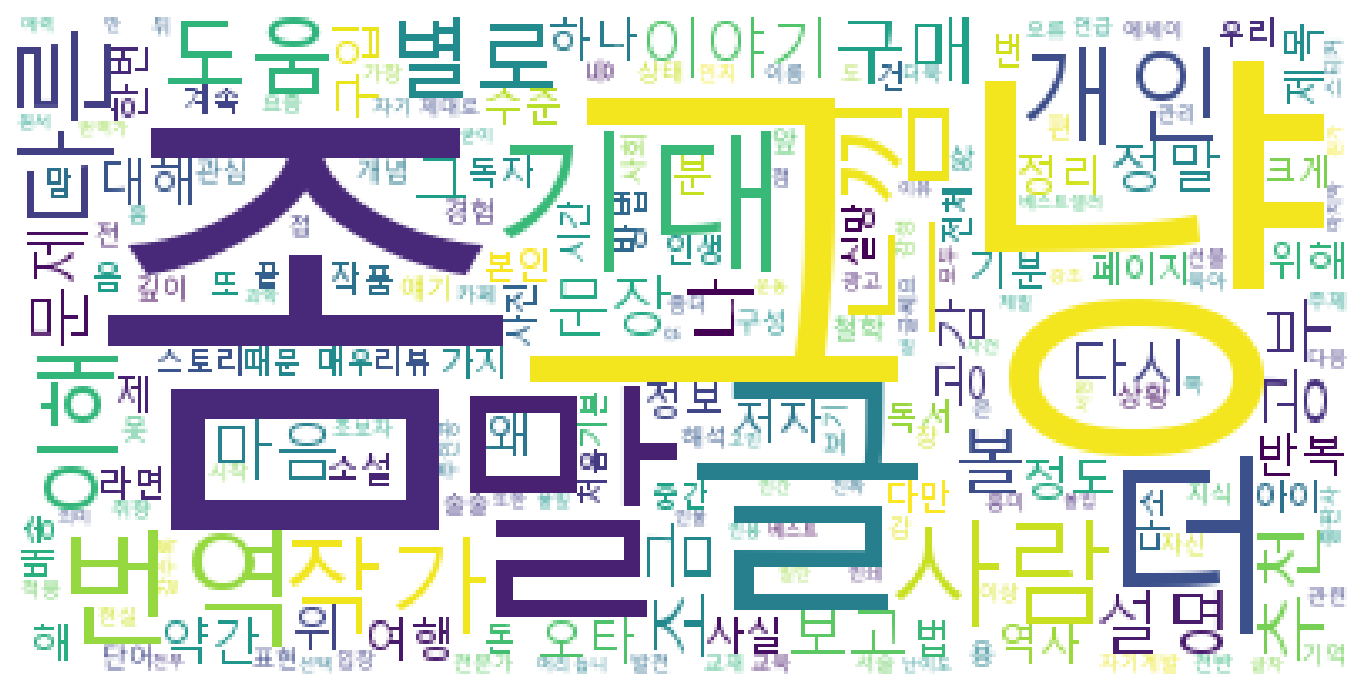

In [59]:
# 평점 2점대 많이 나오는 단어 클라우드
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data2 = ko2.vocab().most_common(200)

wordcloud = WordCloud(font_path=f_path, relative_scaling= 0.2, 
                      background_color='white',
                      ).generate_from_frequencies(dict(data2))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

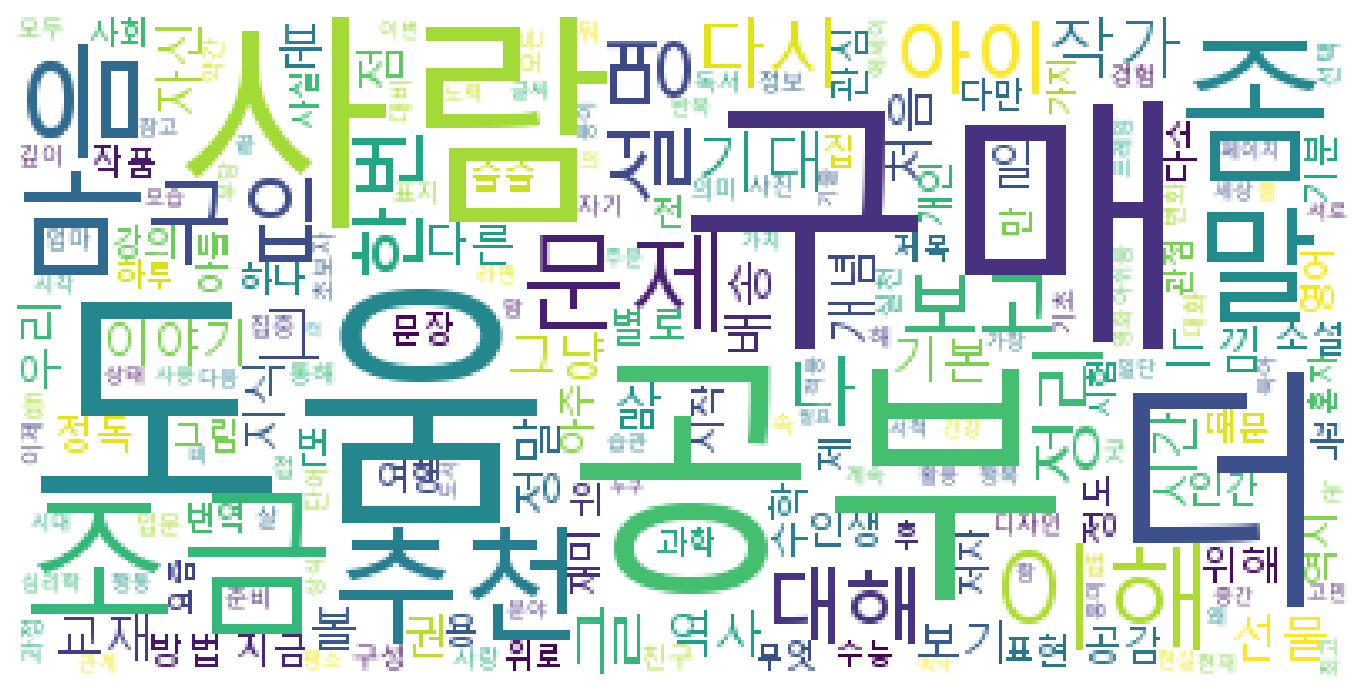

In [60]:
#평점 3점대 많이 나오는 단어 클라우드
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data3 = ko3.vocab().most_common(200)

wordcloud = WordCloud(font_path=f_path, relative_scaling= 0.2, 
                      background_color='white',
                      ).generate_from_frequencies(dict(data3))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

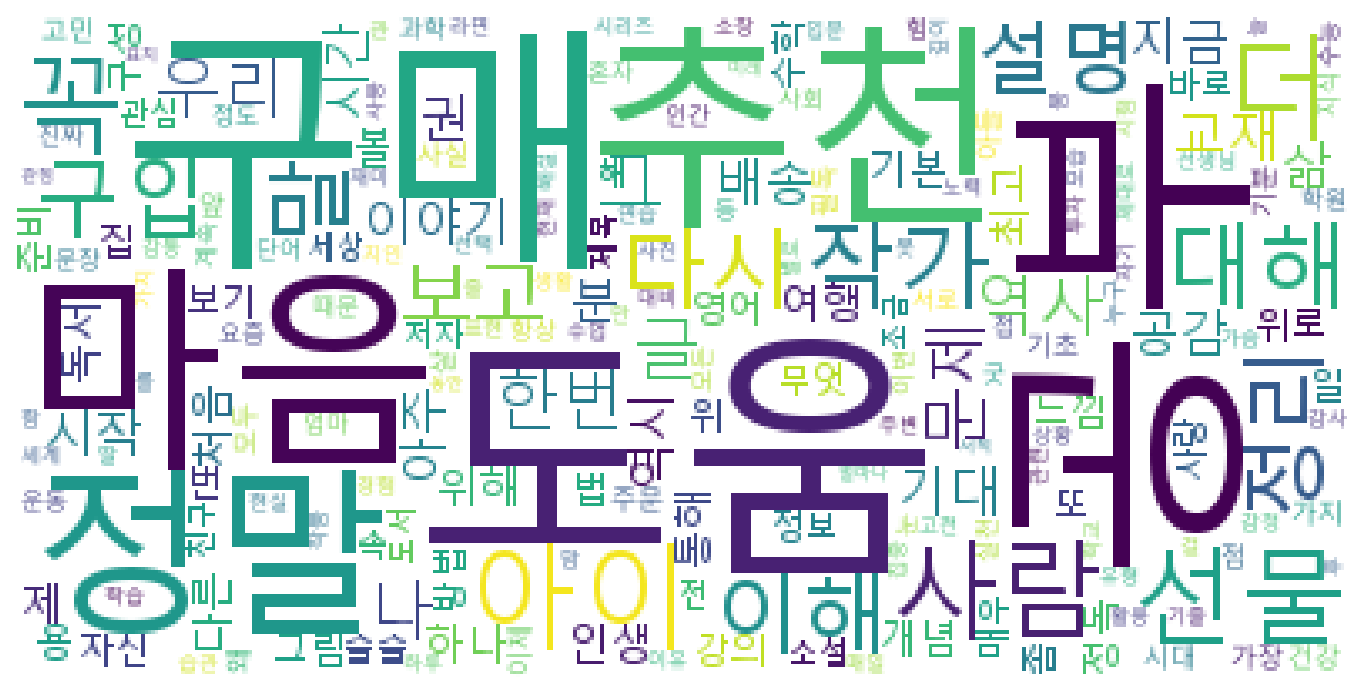

In [61]:
#평점 4점대 많이 나오는 단어 클라우드
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data4 = ko4.vocab().most_common(200)

wordcloud = WordCloud(font_path=f_path, relative_scaling= 0.2, 
                      background_color='white',
                      ).generate_from_frequencies(dict(data4))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 1) 데이터 전처리: 1, 2점은 부정(0), 3,4점은 긍정(1)으로 치환

In [138]:
df_review['sentiment'] = ""

for i in range(len(df_review)):

    if df_review['grade'][i] >= 3.0:
        df_review['sentiment'][i] = '1'
    else:
        df_review['sentiment'][i] = '0'


C:\Users\shine\Anaconda3\envs\fc\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shine\Anaconda3\envs\fc\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [139]:
#1~2점(부정) : 1678 / 3~4점(긍정): 40,357
df_review['sentiment'].value_counts()

1    40357
0     1678
Name: sentiment, dtype: int64

### 2) Train, Test 데이터 나누기

In [140]:
# train 30,000, test 12,035 개
train_df = df_review[:30000]
test_df = df_review[30000:42035]

### 3) 리뷰를 형태소 단위로 나누고 학습

In [141]:
from konlpy.tag import Okt

Okt = Okt()

def okt_tokenizer(text):
    tokens_ko = Okt.morphs(text)
    return tokens_ko

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=okt_tokenizer,
                            ngram_range=(1, 2),
                            min_df = 3, 
                            max_df = 0.9)

tfidf_vect.fit(train_df['review'])
tfidf_matrix_train = tfidf_vect.transform(train_df['review'])

C:\Users\shine\Anaconda3\envs\fc\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [143]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 400)
lgbm_clf.fit(tfidf_matrix_train, train_df['sentiment'])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### 4) 테스트 -> Accuracy 측정 97%

In [144]:
from sklearn.metrics import accuracy_score

tfidf_matrix_test = tfidf_vect.transform(test_df['review'])
preds = lgbm_clf.predict(tfidf_matrix_test)

accuracy_score(test_df['sentiment'], preds)

0.9726630660573328

### 5) 문장 입력 테스트

In [167]:
lgbm_clf.predict(tfidf_vect.transform(['책 좀 별로에요']))

array(['0'], dtype=object)

In [168]:
lgbm_clf.predict(tfidf_vect.transform(['눈물 흘렸어요']))

array(['1'], dtype=object)

In [169]:
lgbm_clf.predict(tfidf_vect.transform(['이게 왜 베스트셀러인지 모르겠어요']))

array(['0'], dtype=object)

In [170]:
lgbm_clf.predict(tfidf_vect.transform(['공감이 많이 되었어요']))

array(['1'], dtype=object)

In [171]:
def write_review():
    
    review = input('리뷰 입력: ')
    
    string = [review]
    pred = lgbm_clf.predict(tfidf_vect.transform(string))
    
    if pred == ['1']:
        print('긍정 리뷰')
    else: 
        print('부정 리뷰')
    

### 6) 결과

In [172]:
write_review()

리뷰 입력: 이게 왜 베스트셀러인지 모르겠어요
부정 리뷰


In [173]:
write_review()

리뷰 입력: 책 좀 별로네요
부정 리뷰


참고: https://github.com/glowpickteam/glowpick_project/blob/master/machinelearning/glowpick_review_analysis.ipynb